In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tqdm import tqdm
from random import shuffle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras import optimizers
from keras.models import load_model

Using TensorFlow backend.


In [2]:
TRAIN_DIR='/home/rahulchakwate/My_tensorflow/DataSets/cats_and_dogs_2/train'
IMG_SIZE=50
LR=1e-3
MODEL_NAME='cat-dog-convnet'

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

def create_label(image_name):
    word_label=image_name.split('.')[-3]
    if word_label=='cat':
        return np.array([1,0])
    elif word_label=='dog':
        return np.array([0,1])


In [3]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path=os.path.join(TRAIN_DIR,img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img_data),create_label(img)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data



In [ ]:
train_data=create_train_data()

 10%|█         | 2511/25000 [00:36<05:22, 69.65it/s]

In [10]:
train=train_data
X_train=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train=np.array([i[1] for i in train])
print(X_train.shape)
print(y_train.shape)

(1001, 50, 50, 1)
(1001, 2)


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='random_normal',input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2,activation='softmax'))
adam=optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=X_train,y=y_train,batch_size=4,epochs=10,verbose=1,validation_split=0.2)

Train on 800 samples, validate on 201 samples
Epoch 1/10
800/800 [==============================] - 17s 21ms/step - loss: 0.9869 - acc: 0.5162 - val_loss: 0.6934 - val_acc: 0.5373
Epoch 2/10
800/800 [==============================] - 16s 20ms/step - loss: 0.7102 - acc: 0.5450 - val_loss: 0.6930 - val_acc: 0.5522
Epoch 3/10
800/800 [==============================] - 16s 20ms/step - loss: 0.6994 - acc: 0.5400 - val_loss: 0.6970 - val_acc: 0.4776
Epoch 4/10
800/800 [==============================] - 17s 21ms/step - loss: 0.6889 - acc: 0.5413 - val_loss: 0.6792 - val_acc: 0.5423
Epoch 5/10
800/800 [==============================] - 16s 21ms/step - loss: 0.6734 - acc: 0.5700 - val_loss: 0.6775 - val_acc: 0.5473
Epoch 6/10
800/800 [==============================] - 16s 20ms/step - loss: 0.6746 - acc: 0.5825 - val_loss: 0.6880 - val_acc: 0.5423
Epoch 7/10
800/800 [==============================] - 17s 22ms/step - loss: 0.6689 - acc: 0.5725 - val_loss: 0.6770 - val_acc: 0.5721
Epoch 8/10
800/8

In [12]:
# Save model and weights
if not os.path.isdir(save_dir):
     os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/rahulchakwate/My_tensorflow/saved_models/keras_cifar10_trained_model.h5 


In [14]:
model2=load_model(model_path)

In [15]:
history2=model2.fit(x=X_train,y=y_train,batch_size=4,epochs=10,verbose=1,validation_split=0.2)

Train on 800 samples, validate on 201 samples
Epoch 1/10
800/800 [==============================] - 14s 17ms/step - loss: 0.6158 - acc: 0.6600 - val_loss: 0.6821 - val_acc: 0.5771
Epoch 2/10
800/800 [==============================] - 14s 17ms/step - loss: 0.6015 - acc: 0.6637 - val_loss: 0.7176 - val_acc: 0.5871
Epoch 3/10
800/800 [==============================] - 14s 18ms/step - loss: 0.5697 - acc: 0.7125 - val_loss: 0.7779 - val_acc: 0.5721
Epoch 4/10
800/800 [==============================] - 15s 19ms/step - loss: 0.5200 - acc: 0.7212 - val_loss: 0.7693 - val_acc: 0.5821
Epoch 5/10
800/800 [==============================] - 16s 20ms/step - loss: 0.4840 - acc: 0.7575 - val_loss: 0.7911 - val_acc: 0.5920
Epoch 6/10
800/800 [==============================] - 16s 21ms/step - loss: 0.4529 - acc: 0.7700 - val_loss: 0.8135 - val_acc: 0.6020
Epoch 7/10
800/800 [==============================] - 16s 21ms/step - loss: 0.4145 - acc: 0.7913 - val_loss: 0.8889 - val_acc: 0.6169
Epoch 8/10
800/8

In [16]:
# Save model and weights
if not os.path.isdir(save_dir):
     os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/rahulchakwate/My_tensorflow/saved_models/keras_cifar10_trained_model.h5 


In [17]:
model3=load_model(model_path)

In [18]:
adam=optimizers.Adam(lr=0.00001)
model3.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history3=model3.fit(x=X_train,y=y_train,batch_size=4,epochs=5,verbose=1,validation_split=0.2)

Train on 800 samples, validate on 201 samples
Epoch 1/5
800/800 [==============================] - 14s 18ms/step - loss: 0.2684 - acc: 0.8962 - val_loss: 0.9796 - val_acc: 0.6617
Epoch 2/5
800/800 [==============================] - 14s 17ms/step - loss: 0.2621 - acc: 0.8975 - val_loss: 0.9953 - val_acc: 0.6318
Epoch 3/5
800/800 [==============================] - 14s 18ms/step - loss: 0.2473 - acc: 0.8962 - val_loss: 1.0255 - val_acc: 0.6418
Epoch 4/5
800/800 [==============================] - 15s 19ms/step - loss: 0.2378 - acc: 0.8975 - val_loss: 1.0628 - val_acc: 0.6418
Epoch 5/5
800/800 [==============================] - 15s 19ms/step - loss: 0.2433 - acc: 0.8962 - val_loss: 1.0373 - val_acc: 0.6318


In [45]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


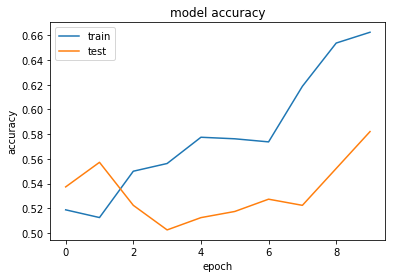

In [57]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

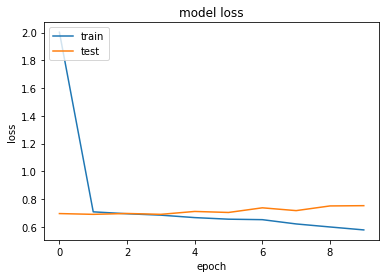

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
keras.callbacks.TensorBoard(log_dir='/tmp/log')